In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
#read data
data = pd.read_csv('spam.csv')
X, y = data.Message, data.spamORham
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
#vectorization of features
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [4]:
#classification
clf1 = DecisionTreeClassifier(criterion='gini', max_depth=7,)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)

clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=7,)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)

Gini
Score on test:  0.9551435406698564
Score on train:  0.9733333333333334


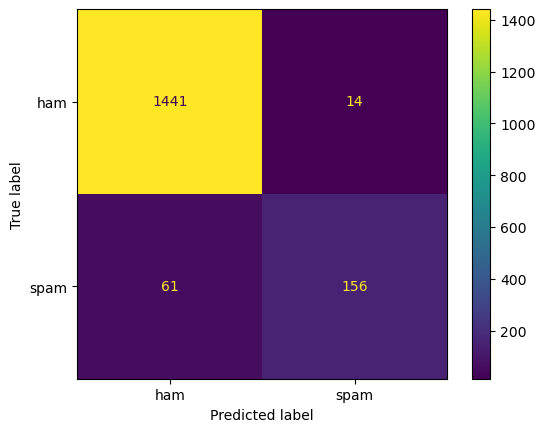

In [5]:
#Gini
print('Gini')
print('Score on test: ', clf1.score(X_test, y_test))
print('Score on train: ', clf1.score(X_train, y_train))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)

Entropy
Score on test:  0.9533492822966507
Score on train:  0.9728205128205129


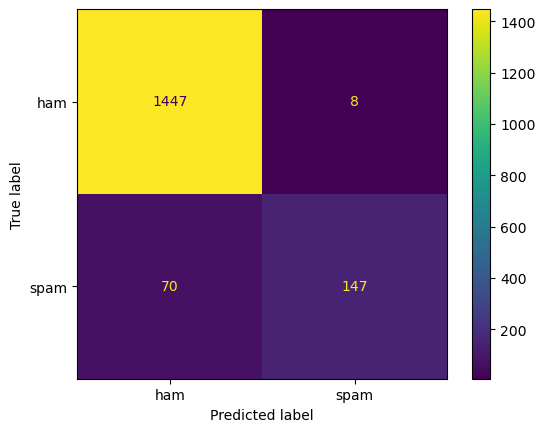

In [6]:
#Entropy
print('Entropy')
print('Score on test: ', clf2.score(X_test, y_test))
print('Score on train: ', clf2.score(X_train, y_train))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)

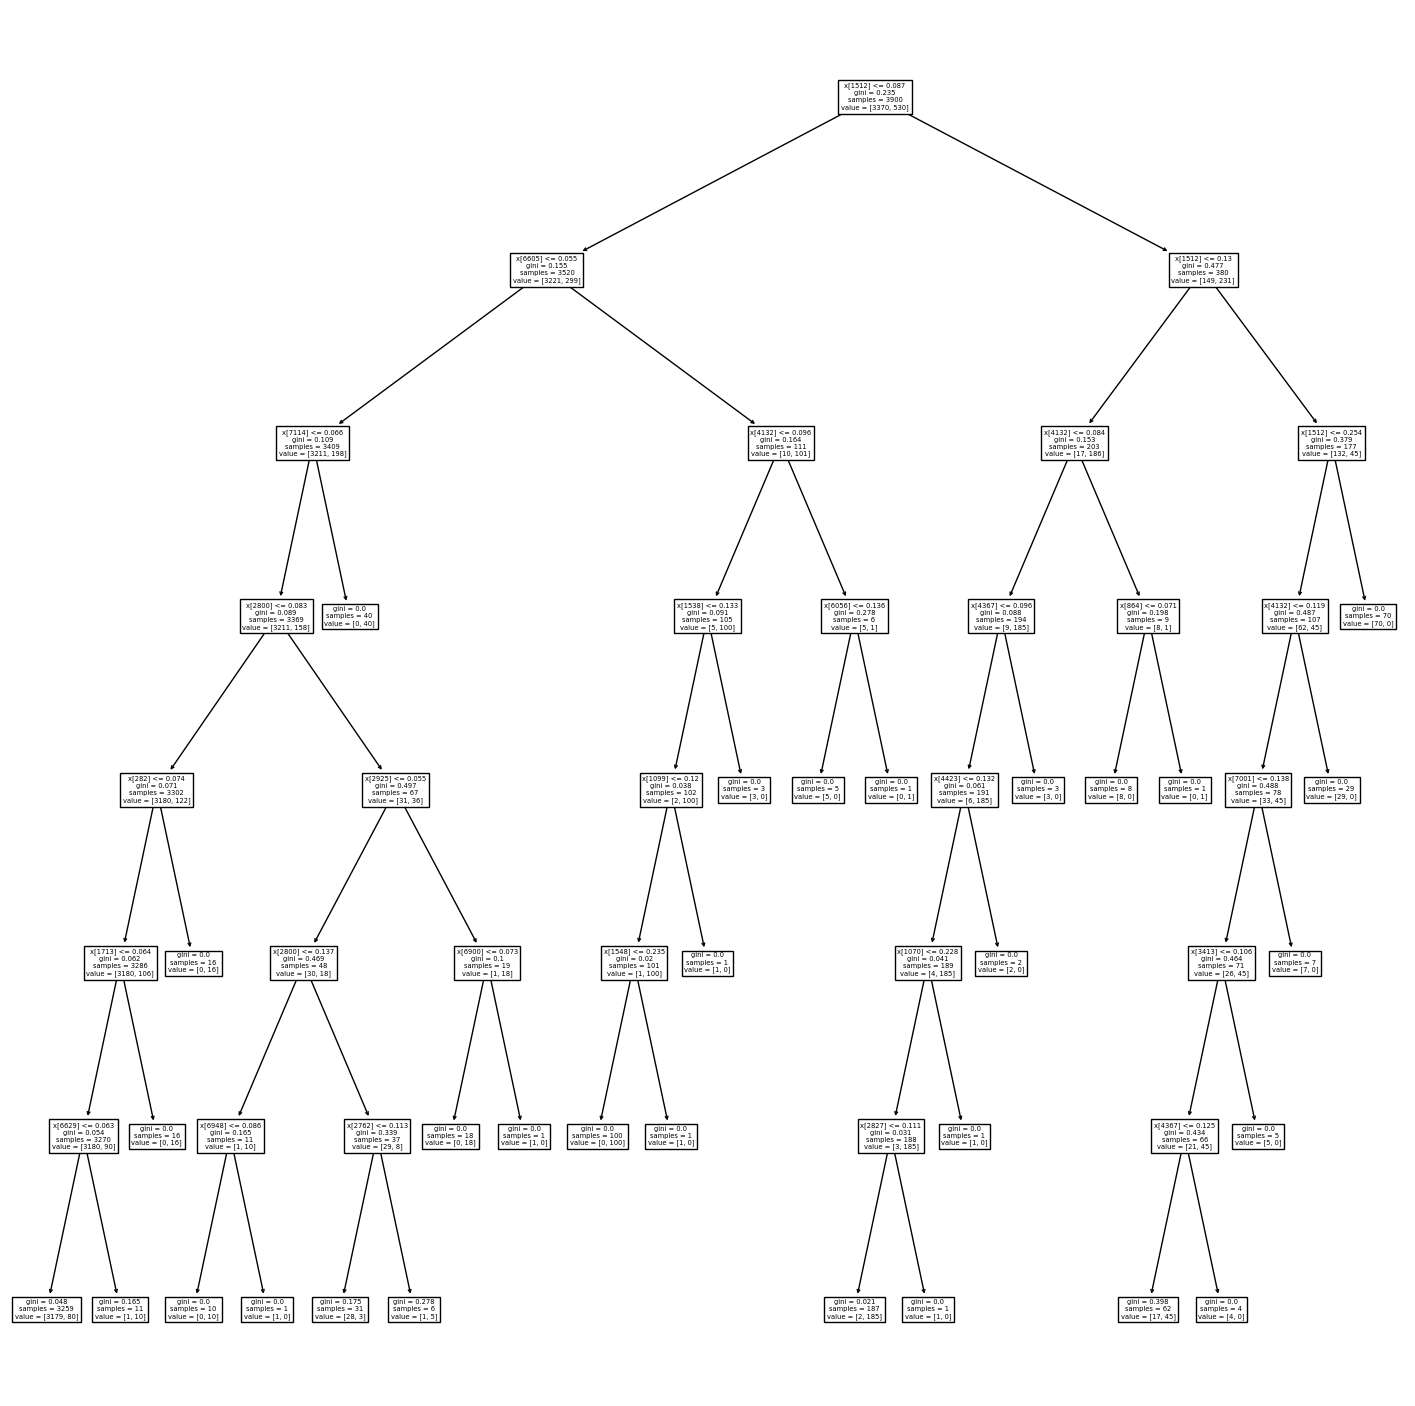

In [7]:
plt.figure(figsize=(18, 18))
tree.plot_tree(clf1)
plt.savefig('tree_gini')

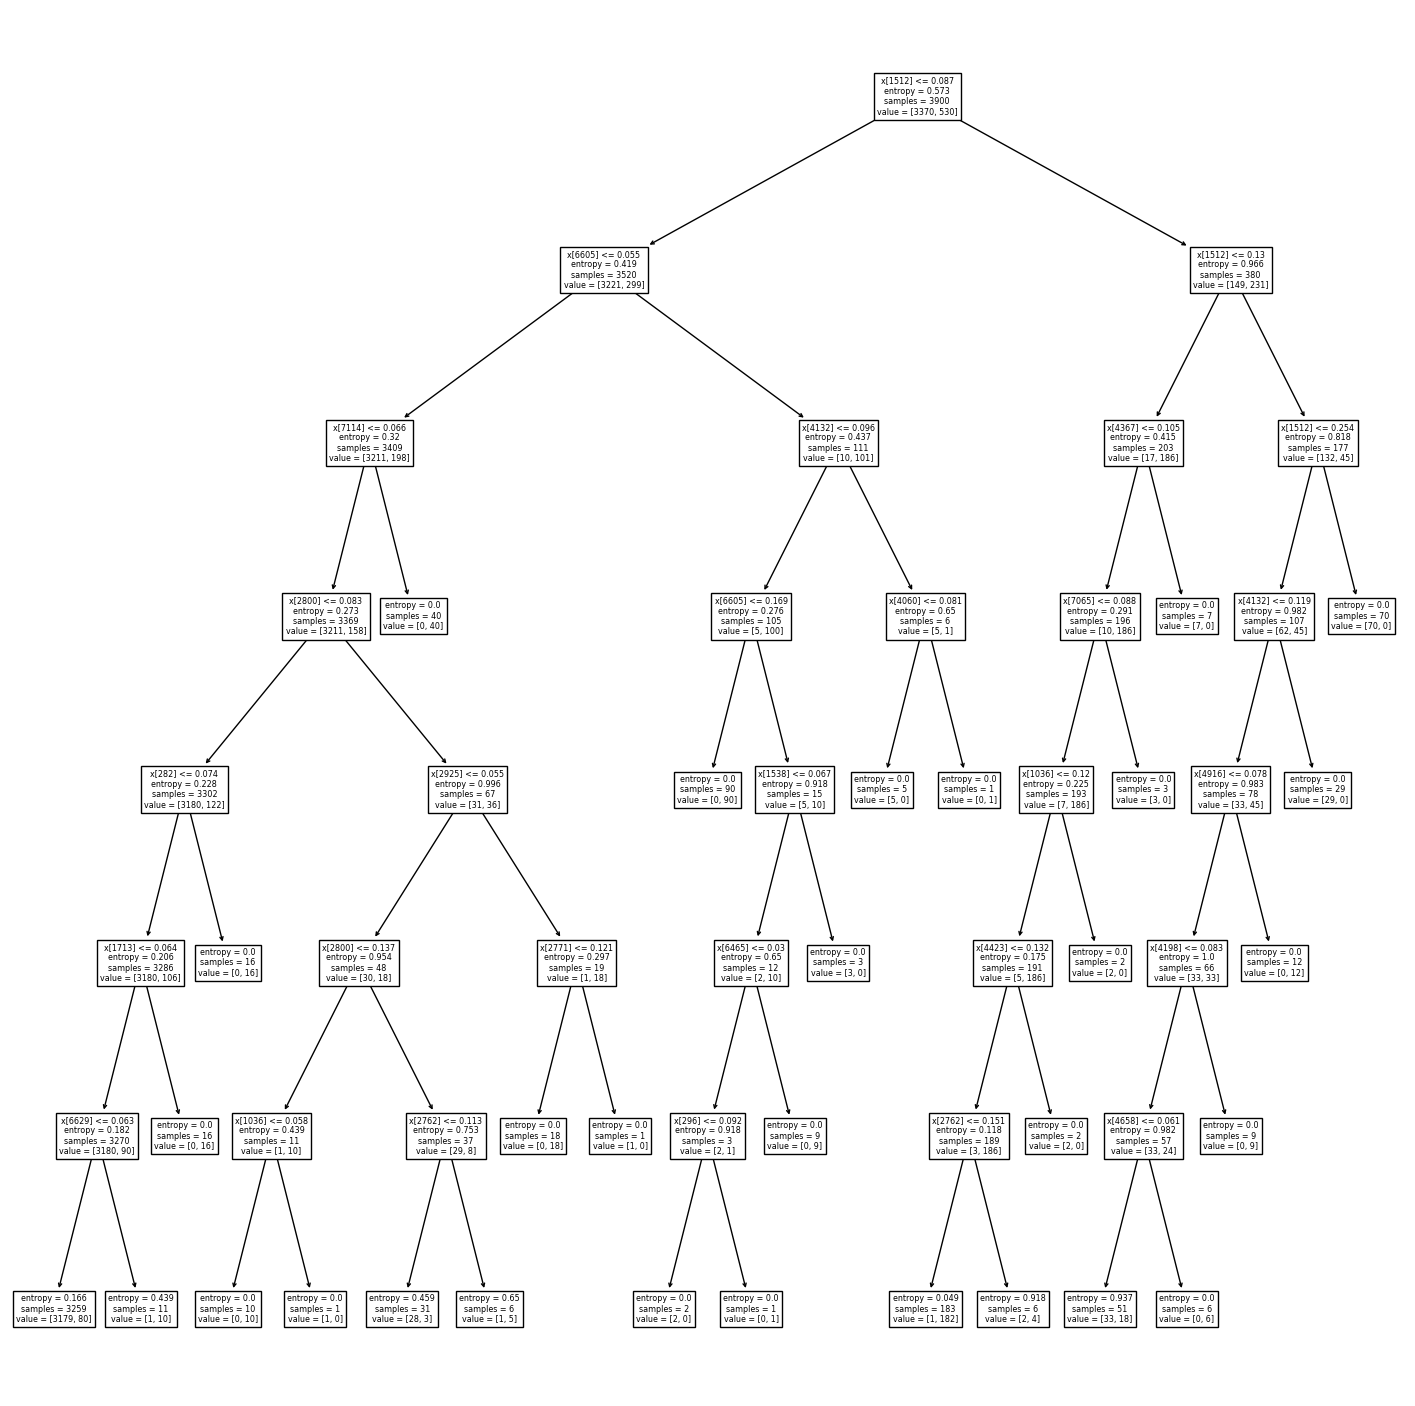

In [8]:
plt.figure(figsize=(18, 18))
tree.plot_tree(clf2)
plt.savefig('tree_entropy')